## Probability that the histogram for the sum of two dice has an expected shape

[StackExchange question.](https://math.stackexchange.com/questions/4411436/probability-that-the-histogram-for-the-sum-of-two-dice-has-an-expected-shape)

In [1]:
import piplite
await piplite.install("icepool")

import icepool

class IsTriangleIsh(icepool.EvalPool):
    def __init__(self, rise_end, fall_start):
        self.rise_end = rise_end
        self.fall_start = fall_start
    
    def next_state(self, state, outcome, count):
        # State consists of the previous count,
        # or -1 if the rise-fall pattern was violated.
        if state is None:
            return count
        if state == -1:
            return -1
        if outcome <= self.rise_end and count < state:
            return -1
        if outcome > self.fall_start and count > state:
            return -1
        return count
    
    def final_outcome(self, final_state, _):
        return final_state >= 0

evaluator = IsTriangleIsh(7, 7)
# 2d6
die = 2 @ icepool.d6

# Some sanity checks:
print(evaluator.eval(die.pool(1)))
print(evaluator.eval(die.pool(2)))

Denominator: 36
| Outcome | Weight | Probability |
|--------:|-------:|------------:|
|   False |     30 |  83.333333% |
|    True |      6 |  16.666667% |

Denominator: 1296
| Outcome | Weight | Probability |
|--------:|-------:|------------:|
|   False |   1140 |  87.962963% |
|    True |    156 |  12.037037% |



Computation time: 235 s


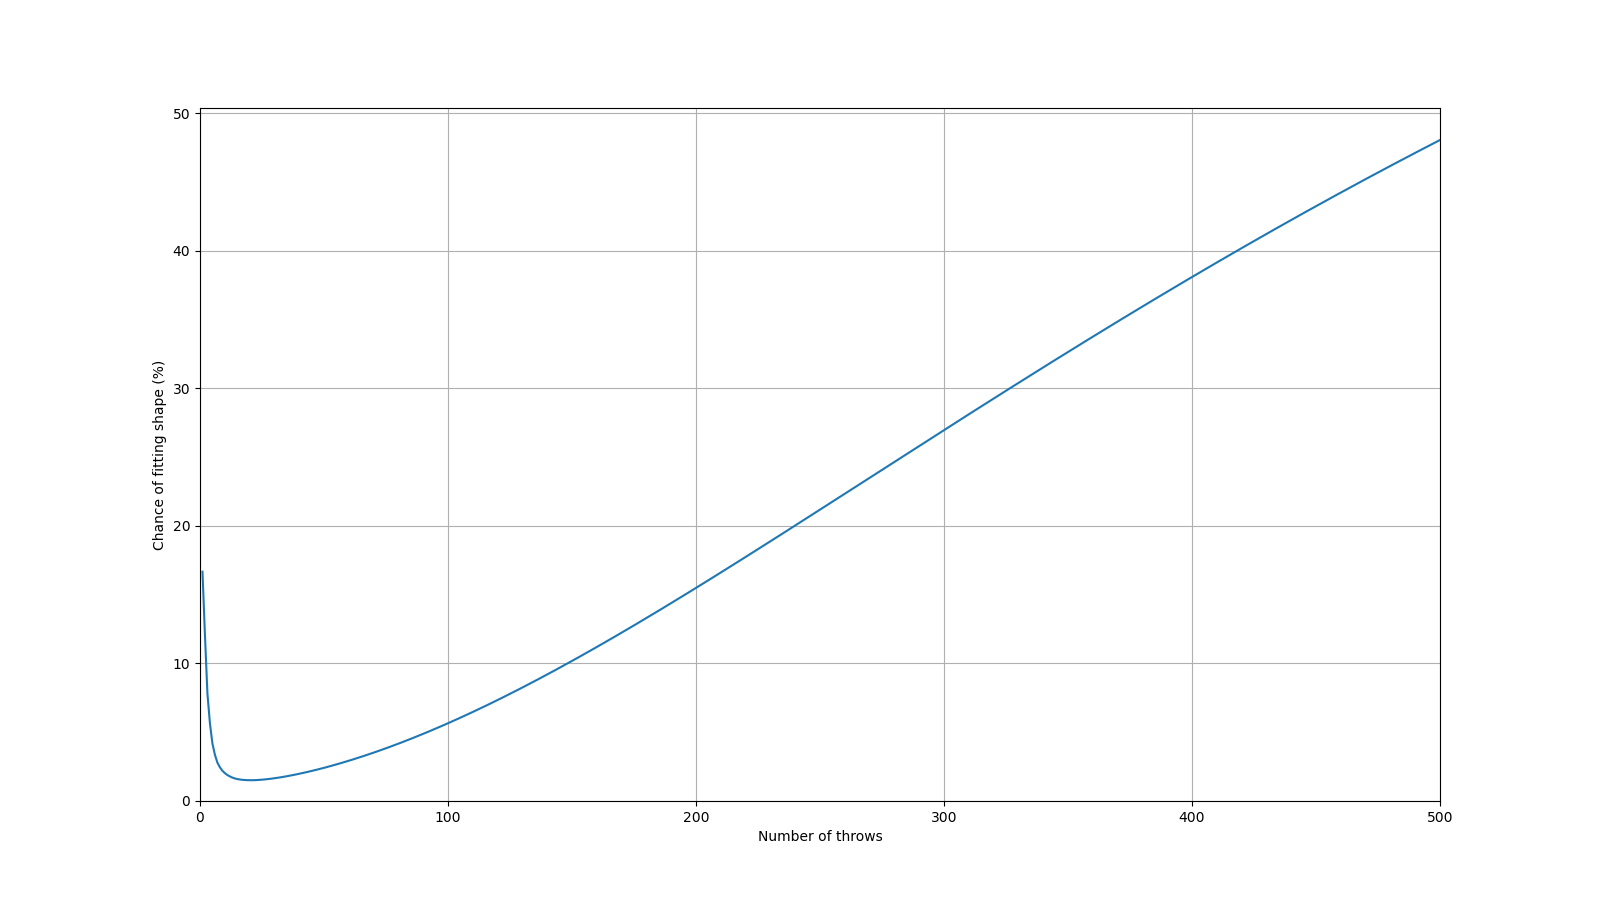

In [2]:
max_n = 500
x = [n for n in range(1, max_n+1)]
y = []

import time

start_ns = time.perf_counter_ns()
for n in x:
    y.append(evaluator.eval(die.pool(n)).mean() * 100.0)
end_ns = time.perf_counter_ns()
elapsed_s = round((end_ns - start_ns) * 1e-9)
print(f'Computation time: {elapsed_s} s')
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x, y)
ax.grid()
ax.set_xlabel('Number of throws')
ax.set_ylabel('Chance of fitting shape (%)')
ax.set_xlim(left=0, right=max_n)
ax.set_ylim(bottom=0)
plt.show()